In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

In [2]:
df=pd.read_csv('sphist.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


In [3]:
df["Date"]=pd.to_datetime(df["Date"])
df=df.sort_values(by="Date").reset_index(drop=True)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66
1,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85
2,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93
3,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98
4,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08


In [4]:
for i, row in df.iterrows():
    row['day_5']=0
    row['day_5_std']=0
    row['day_30']=0
    row['day_30_std']=0
    if (i-5)>=0:          
        five_day_data=[df['Close'].iloc[j] for j in range (i-5,i)]
        row['day_5']=np.array(five_day_data).mean()
        row['day_5_std']=np.array(five_day_data).std()
        df.loc[i,'day_5']=row['day_5']
        df.loc[i,'day_5_std']=row['day_5_std']
    if (i-30)>=0:          
        thirty_day_data=[df['Close'].iloc[j] for j in range (i-30,i)]
        row['day_30']=np.array(thirty_day_data).mean()
        row['day_30_std']=np.array(thirty_day_data).std()
        df.loc[i,'day_30']=row['day_30']
        df.loc[i,'day_30_std']=row['day_30_std']
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,day_5,day_5_std,day_30,day_30_std
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000,NaN,NaN,NaN,NaN
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000,NaN,NaN,NaN,NaN
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000,NaN,NaN,NaN,NaN
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000,NaN,NaN,NaN,NaN
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000,NaN,NaN,NaN,NaN
5,1950-01-10,17.030001,17.030001,17.030001,17.030001,2.160000e+06,17.030001,16.900000,0.141280,NaN,NaN
6,1950-01-11,17.090000,17.090000,17.090000,17.090000,2.630000e+06,17.090000,16.974000,0.079649,NaN,NaN
7,1950-01-12,16.760000,16.760000,16.760000,16.760000,2.970000e+06,16.760000,17.022000,0.060465,NaN,NaN
8,1950-01-13,16.670000,16.670000,16.670000,16.670000,3.330000e+06,16.670000,16.988000,0.120565,NaN,NaN
9,1950-01-16,16.719999,16.719999,16.719999,16.719999,1.460000e+06,16.719999,16.926000,0.175795,NaN,NaN


In [5]:
df=df[df["Date"] >= datetime(year=1951, month=1, day=3)].dropna(axis=0)

In [6]:
train=df[df["Date"] < datetime(year=2013, month=1, day=1)]
test=df[df["Date"] >= datetime(year=2013, month=1, day=1)]

In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train[['day_5','day_5_std','day_30']], train['Close'])
predictions=lr.predict(test[['day_5','day_5_std', 'day_30']])
mae=sum(abs(predictions-test['Close']))/len(predictions)
print(mae)

16.1262485694


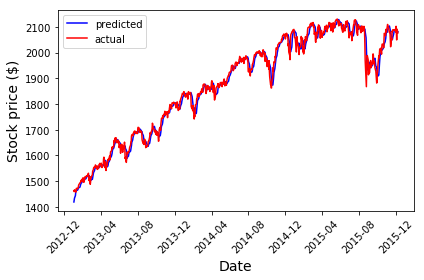

In [20]:
import matplotlib.pyplot as plt
plt.plot(test["Date"], predictions, c='blue', label="predicted")
plt.plot(test["Date"], test['Close'], c='red', label="actual")
#plt.xlim(['2015-12-01','2015-12-31'])
plt.xticks(rotation=45)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Stock price ($)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig("stockprice")
plt.show()

In [21]:
lr.fit(train[['day_5','day_5_std','day_30','day_30_std']], train['Close'])
predictions=lr.predict(test[['day_5','day_5_std', 'day_30','day_30_std']])
mae=sum(abs(predictions-test['Close']))/len(predictions)
print(mae)

16.2188407281


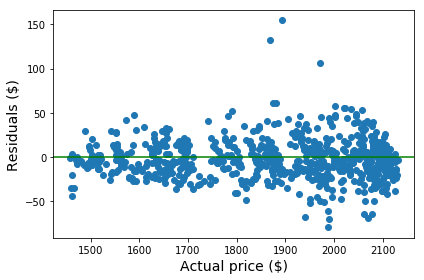

In [22]:
residual = predictions-test['Close']
plt.scatter(test['Close'], residual)
plt.axhline(color='g')
plt.xlabel("Actual price ($)",fontsize=14)
plt.ylabel("Residuals ($)", fontsize=14)
#plt.legend()
plt.tight_layout()
plt.savefig("residuals")
plt.show()


In [18]:
lr.fit(train[['day_5','day_5_std']], train['Close'])
predictions=lr.predict(test[['day_5','day_5_std']])
mae=sum(abs(predictions-test['Close']))/len(predictions)
print(mae)

16.1181639454


In [19]:
lr.fit(train[['day_5']], train['Close'])
predictions=lr.predict(test[['day_5']])
mae=sum(abs(predictions-test['Close']))/len(predictions)
print(mae)

16.2675332145
